# Metodo Newton-Raphson

se define un punto, se calcula la función y lapendiente en dicho punto; luego, se proyecta la pendiente y en ese punto de corte, uno se acerca a la raiz, iterando n veces hasta encontrar un punto menor a un epsilon.

Se define f a travez de una serie de Taylor.

Por lo tanto se creará una función que encuentre raices con el método.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import sympy as sp
import scipy

In [56]:
# Hago una función para hacer rapido el proceso Newton-Raphson:
def new_rap(f,df,x_0,eps,N_max):

  x_0 = x_0

  #Creo un rango de valores para gráficas:
  x=np.arange(-10,10,0.1)
  #Dibujar función:
  plt.plot(x,f(x), label='f(x)')
  plt.xlabel('X')
  plt.ylabel('$f(x)$')
  plt.title('Metodo Newton-Raphson')

  #se define el epsilon y se inicia contador:
  epsilon = eps
  i=0

  #se inicia el ciclo N-R para hallar valor cercano a raiz:
  while (abs(f(x_0)) >= epsilon and i < N_max):
    #Definir la tangente en el punto x_0:
    y=lambda x: df(x_0)*(x-x_0)+f(x_0)

    #Graficar la derivada en el punto x_0:
    plt.plot(x,y(x), '--', label='df {}'.format(i))
    plt.legend()
    plt.grid()

    #Calcular el siguiente punto y redefinir x_0
    x_n=x_0 -(f(x_0)/df(x_0))
    x_0=x_n
    i += 1
  return x_0

#para encontrar la derivada de la función utilizamos la librería Scipy:
#Defino la lfunciòn:
f=lambda x: x**2 -5
#Defino variable simbòlica:
x1=sp.symbols("x")
#Defino la derivada simbòlica:
expresion = sp.sympify(f(x1))
#calculo la deriivada:
derivada = sp.diff(expresion,x1)
#Convertir derivada a funciòn
df = sp.lambdify(x1,derivada,'numpy')

La raiz es aproximadamente: 2.2360689


<function matplotlib.pyplot.show(close=None, block=None)>

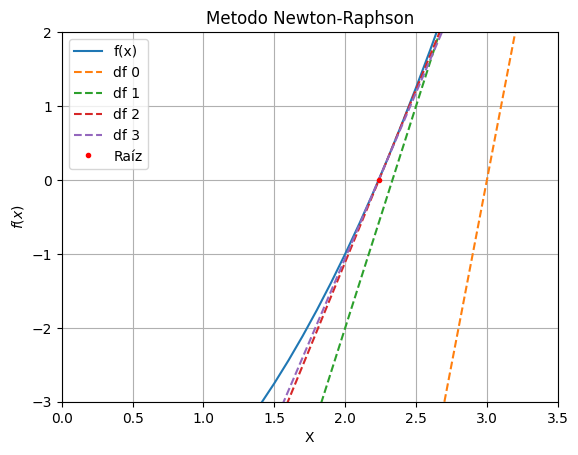

In [55]:
#Probando la función:
x_0=new_rap(f,df,5,10e-5,100)
print('La raiz es aproximadamente:', round(x_0, 7))

#Graficando el punto y limitando la gráfica:
plt.plot(x_0, f(x_0), ".r", label="Raíz")
plt.ylim(-3,2)
plt.xlim(-0,3.5)
plt.legend()
plt.grid()
plt.show


Por librería nos da la raiz:  2.23606797749979
Nuestra función nos dio la siguiente raiz:  2.2360688956433634


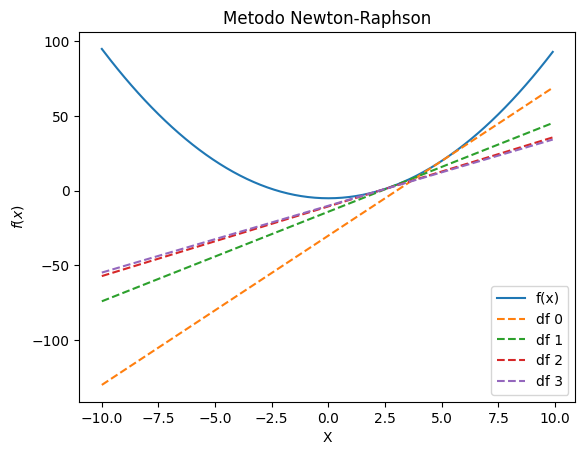

In [59]:
# Verificando con libreria:
print('Por librería nos da la raiz: ', scipy.optimize.newton(f,6,df))
print('Nuestra función nos dio la siguiente raiz: ', new_rap(f,df,5,10e-5,100))
